The dataset 'CaseStudyData_2023.xlsx' encompasses multiple time series variables for upcoming analysis. This set comprises the 'Default Rate', designated as the primary variable, alongside various macroeconomic variables poised to serve as explanatory factors in the ensuing regression study.

In [43]:
import pandas as pd
import numpy as np
from scipy import stats

# Importing data from file 
dfCDR = pd.read_excel('CaseStudyData_2023-1.xlsx', sheet_name= 'Corporate Default Rate')


Commencing with the 'Default Rate', a table outlining summary statistics is presented below.

In [44]:
column = dfCDR.iloc[:, 1]
# Basic statistics
basic_stats = column.describe()

# Advanced statistics
advanced_stats = {
    'Skewness': column.skew(),
    'Kurtosis': column.kurtosis(),
    'Variance': column.var(),
    'Standard Error': column.sem(),
    '95% CI Lower': stats.norm.interval(0.95, loc=column.mean(), scale=column.sem())[0],
    '95% CI Upper': stats.norm.interval(0.95, loc=column.mean(), scale=column.sem())[1]
}

# Combining basic and advanced statistics
all_stats = {**basic_stats.to_dict(), **advanced_stats}

# Formatting as a DataFrame for display
stats_df = pd.DataFrame(list(all_stats.items()), columns=['Statistic', 'Value'])
stats_df.set_index('Statistic', inplace=True)

print(stats_df)

                    Value
Statistic                
count           23.000000
mean             1.585217
std              1.088109
min              0.370000
25%              0.820000
50%              1.210000
75%              2.010000
max              4.190000
Skewness         1.226986
Kurtosis         0.575223
Variance         1.183981
Standard Error   0.226886
95% CI Lower     1.140528
95% CI Upper     2.029906


The above table presents the main statistics like mean, standard deviation, minimum and maximum, quartiles, skewness, kurtosis, variance, standard error and both confidence intervals. It is important to notice that this dataset contains only 23 values. The central tendency of the data is around 1.59, minimum is 0.37 and maximum is 4.19. Standard Deviation (1. 0881) value suggests a moderate level of variability or dispersion around the mean. A standard deviation of about 1.09 indicates that, on average, the data points differ from the mean by this amount. A kurtosis value relatively far from 0 suggests that the data distribution has a shape somewhat unsimilar to a normal distribution in terms of its tails.

This positive skewness (1.2270) indicates that Default Rate dataset has a right-skewed distribution. In other words, there's a longer tail on the right side of the distribution, with more data points located on the lower value side. Which can be easily seen on the Figure 1 below.

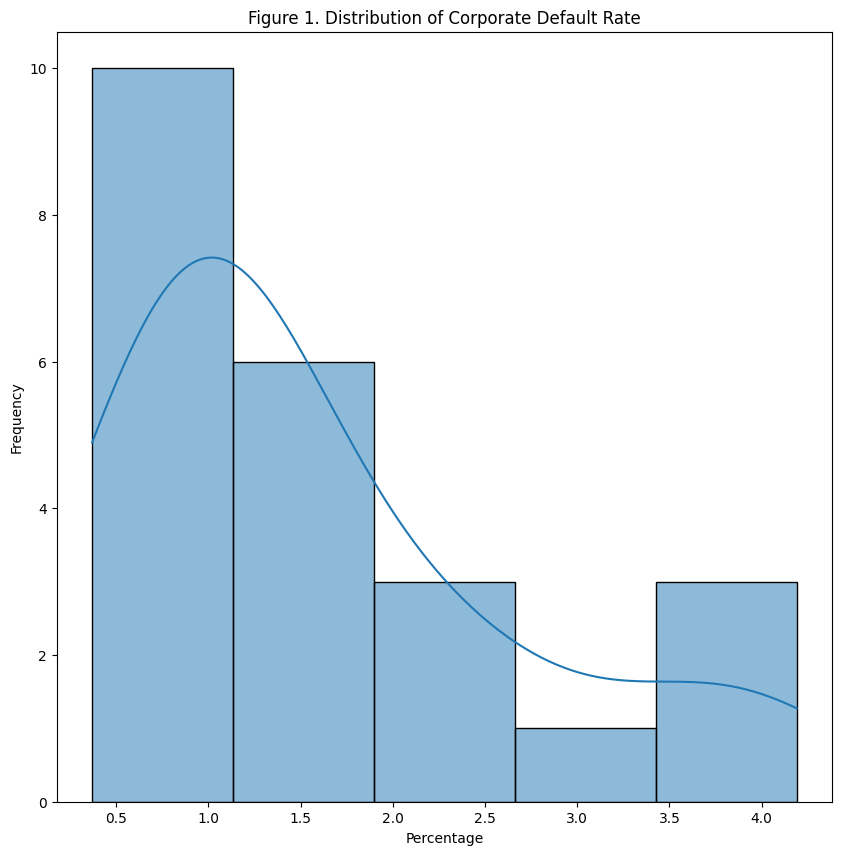

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns


# Plotting the distribution of the variables in the column
plt.figure(figsize=(10, 10))
sns.histplot(column, kde=True, bins=5)

plt.title('Figure 1. Distribution of Corporate Default Rate')
plt.xlabel('Percentage')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

Overall, these statistics suggest a dataset with moderate variability, a tendency to have values clustered around a mean of 1.59, and a right-skewed distribution. The confidence interval indicates a high probability range for the true mean of the underlying population.

The Table 2 below shows the summary statistics of the data provided in the dataset and called historic data – macroeconomic variables which will be used further in model. The statistics presented below are mean, standard deviation, minimum, maximum and median value, as well as skewness, kurtosis, variance and standard error. It is important to notice that this dataset contains only 23 values. By looking at the skewness statistic it is possible to say that variables are relatively distributed close to the middle with the exception of GDP growth rate and CPI rate. This might be observed on the presented below plots of the distribution of data. All variables with the exception of EURIBOR 3-month,
GDP growth rate and Yield structure are positive and their minimum value doesn’t reach negative numbers.

In [46]:
# Importing data from file 
dfHD = pd.read_excel('CaseStudyData_2023-1.xlsx', sheet_name= 'Historic Data')
Nofirstcol = dfHD.iloc[:, 1:]

basic_stats1 = Nofirstcol.describe()
basic_stats1

,"Labor Markets: Unemployment rate, (%, SA)","Consumer Price Index: EU Harmonized - Total, (Index 2015=100, SA)","National Accounts: Real Gross Domestic Product [GDP] - Market exchange rate, (Bil. 2012 USD, CDASAAR)","Interest Rate: EURIBOR - 3-Month, (% p.a., NSA)","Interest Rates: Central government bond yield curve - All bond ratings total - Spot rate - 10 year maturity, (% p.a., NSA)",GDP growth rate,"Yield Structure, long-term - short-term (%)",CPI rate,Unemployment rate
count,23.000000,23.000000,23.000000,23.000000,23.000000,22.000000,23.000000,22.000000,23.000000
mean,9.498601,94.151362,12733.707140,1.439432,2.917446,0.011876,1.478014,0.019988,0.094986
std,1.490999,10.764756,892.650083,1.786991,1.720984,0.025444,0.945489,0.016952,0.014910
min,6.700000,75.807483,11155.393303,-0.548767,0.083607,-0.065798,-0.264527,0.001901,0.067000
25%,8.552944,85.599449,12166.846600,-0.141529,1.187993,0.007901,0.767470,0.012431,0.085529
50%,9.363484,95.667533,12757.556053,0.810958,3.650546,0.018004,1.440000,0.021431,0.093635
75%,10.512047,101.004272,13247.998237,2.706346,4.217056,0.021796,1.962411,0.023778,0.105120
max,12.482158,116.835875,14365.524324,4.634233,5.438877,0.052563,3.077363,0.084000,0.124822


In [47]:
advanced_stats1 = {
    'Skewness': Nofirstcol.skew(),
    'Kurtosis': Nofirstcol.kurtosis(),
    'Variance': Nofirstcol.var(),
    'Standard Error': Nofirstcol.sem(),
    '95% CI Lower': stats.norm.interval(0.95, loc=Nofirstcol.mean(), scale=Nofirstcol.sem())[0],
    '95% CI Upper': stats.norm.interval(0.95, loc=Nofirstcol.mean(), scale=Nofirstcol.sem())[1]
}
adv_result = pd.DataFrame(advanced_stats1)
adv_result

summarised_stats = pd.concat([basic_stats1.T, adv_result],axis=1)
summarised_stats

,count,mean,std,min,25%,50%,75%,max,Skewness,Kurtosis,Variance,Standard Error,95% CI Lower,95% CI Upper
"Labor Markets: Unemployment rate, (%, SA)",23.0,9.498601,1.490999,6.700000,8.552944,9.363484,10.512047,12.482158,0.382171,-0.329508,2.223077,0.310895,8.889259,10.107944
"Consumer Price Index: EU Harmonized - Total, (Index 2015=100, SA)",23.0,94.151362,10.764756,75.807483,85.599449,95.667533,101.004272,116.835875,-0.011156,-0.630539,115.879970,2.244607,89.752013,98.550710
"National Accounts: Real Gross Domestic Product [GDP] - Market exchange rate, (Bil. 2012 USD, CDASAAR)",23.0,12733.707140,892.650083,11155.393303,12166.846600,12757.556053,13247.998237,14365.524324,0.042609,-0.665816,796824.170501,186.130409,12368.898242,13098.516039
"Interest Rate: EURIBOR - 3-Month, (% p.a., NSA)",23.0,1.439432,1.786991,-0.548767,-0.141529,0.810958,2.706346,4.634233,0.620387,-1.076173,3.193338,0.372613,0.709123,2.169740
"Interest Rates: Central government bond yield curve - All bond ratings total - Spot rate - 10 year maturity, (% p.a., NSA)",23.0,2.917446,1.720984,0.083607,1.187993,3.650546,4.217056,5.438877,-0.389848,-1.326797,2.961786,0.358850,2.214113,3.620779
GDP growth rate,22.0,0.011876,0.025444,-0.065798,0.007901,0.018004,0.021796,0.052563,-1.780952,4.128976,0.000647,0.005425,0.001244,0.022509
"Yield Structure, long-term - short-term (%)",23.0,1.478014,0.945489,-0.264527,0.767470,1.440000,1.962411,3.077363,0.213368,-0.657837,0.893950,0.197148,1.091611,1.864417
CPI rate,22.0,0.019988,0.016952,0.001901,0.012431,0.021431,0.023778,0.084000,2.574823,9.777323,0.000287,0.003614,0.012905,0.027072
Unemployment rate,23.0,0.094986,0.014910,0.067000,0.085529,0.093635,0.105120,0.124822,0.382171,-0.329508,0.000222,0.003109,0.088893,0.101079


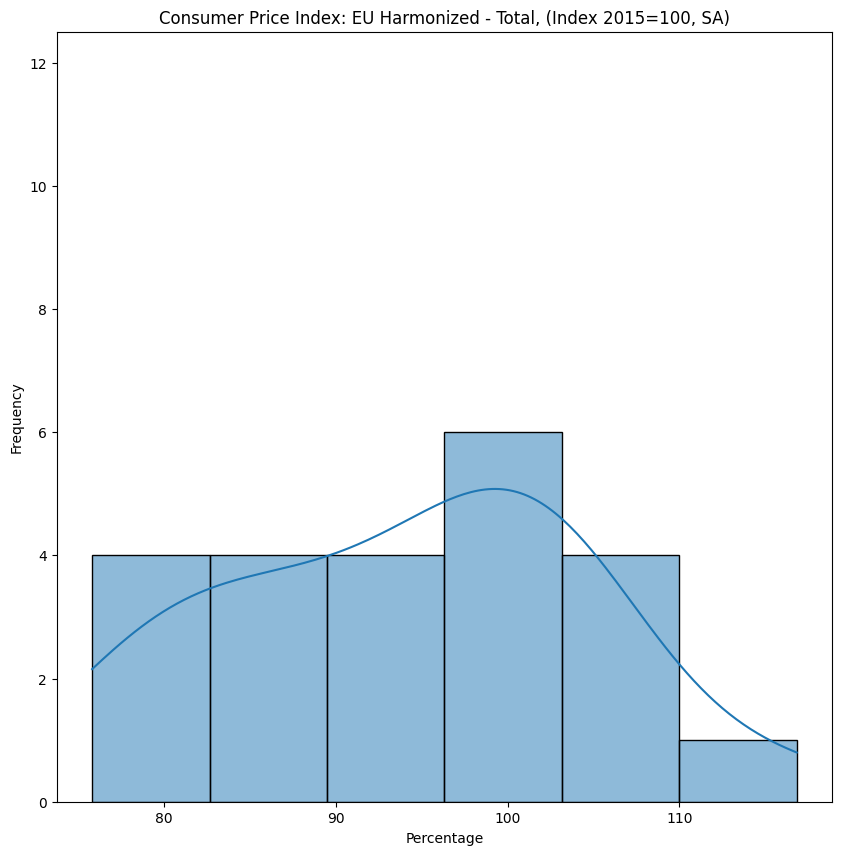

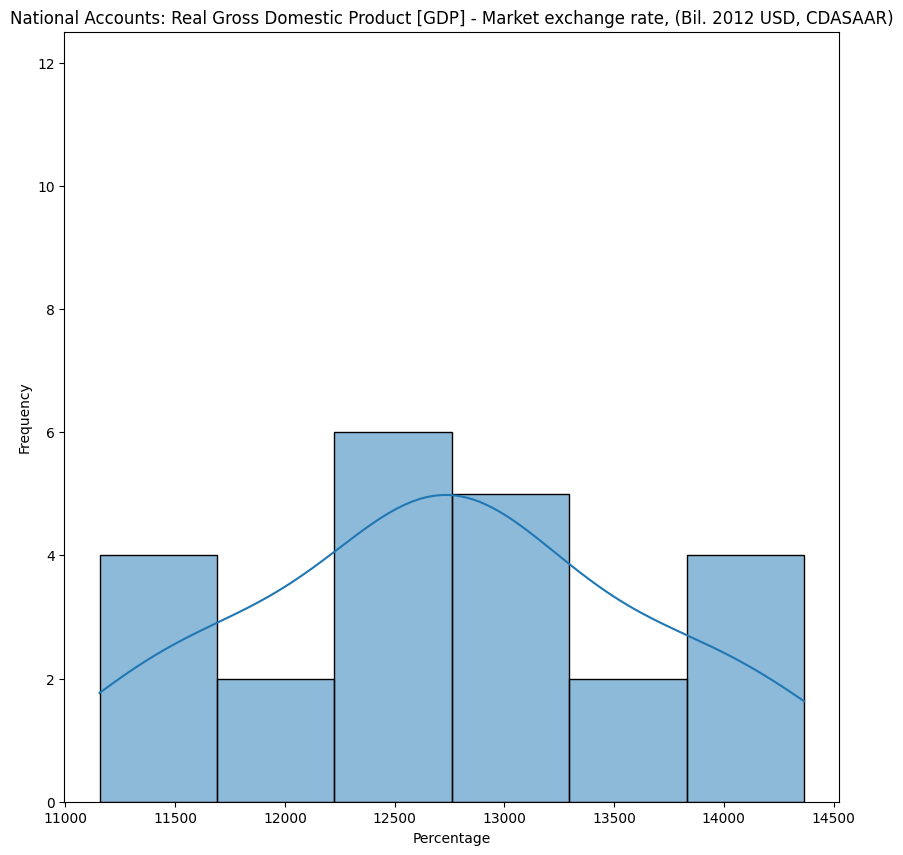

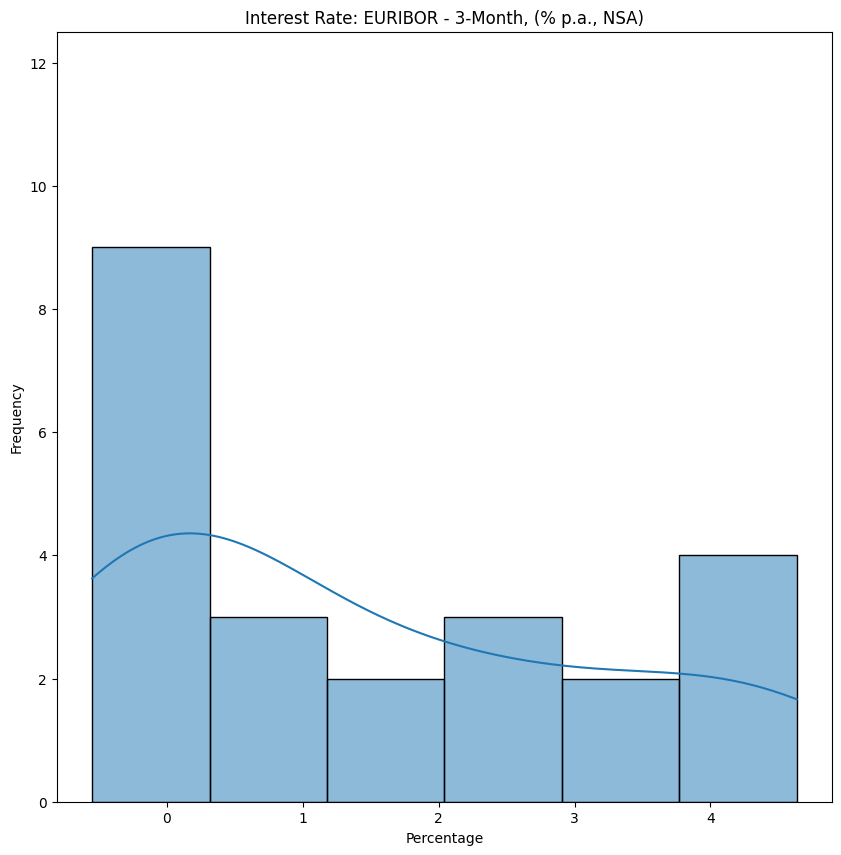

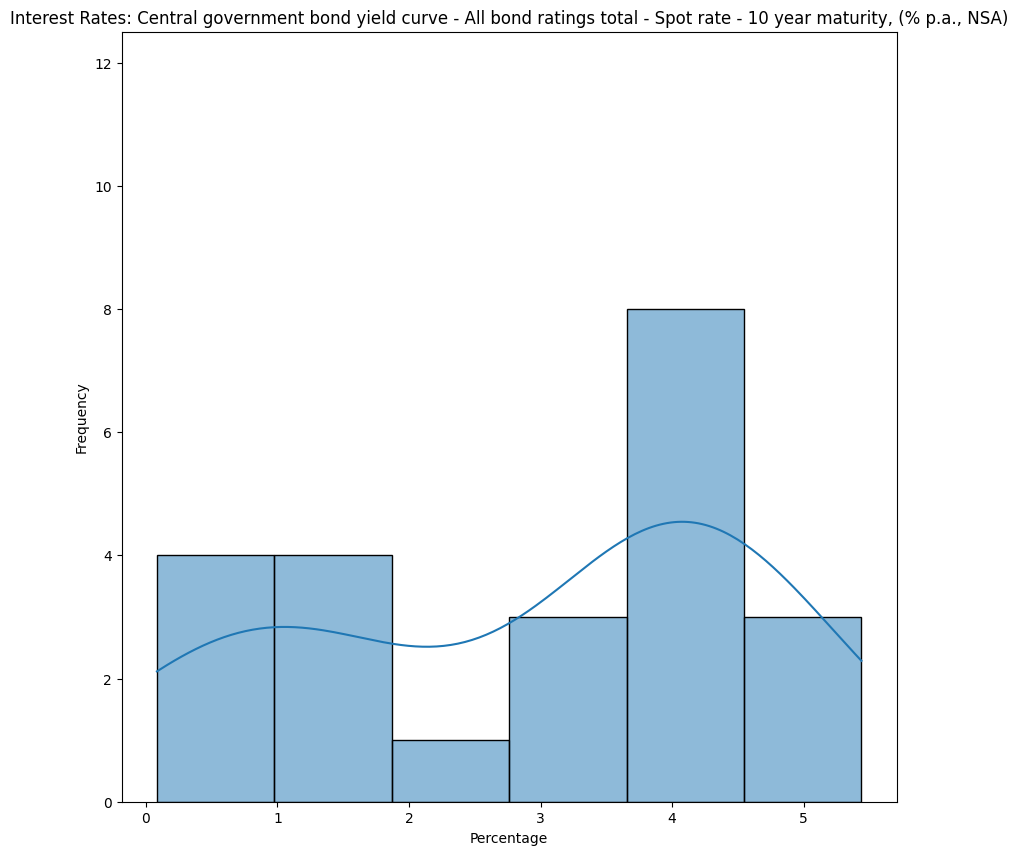

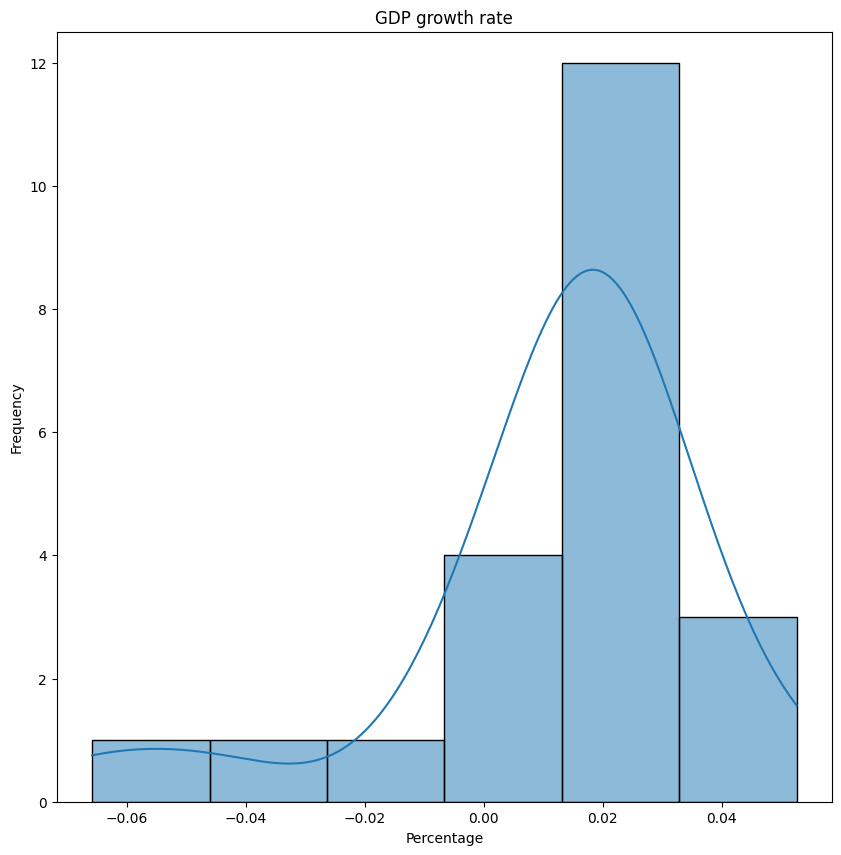

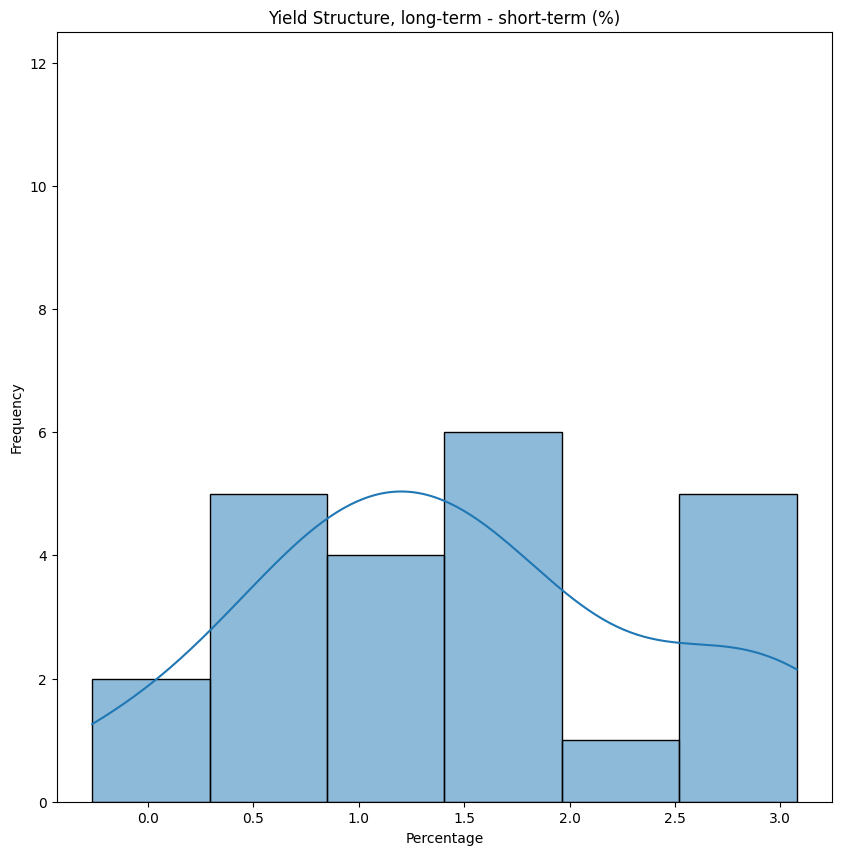

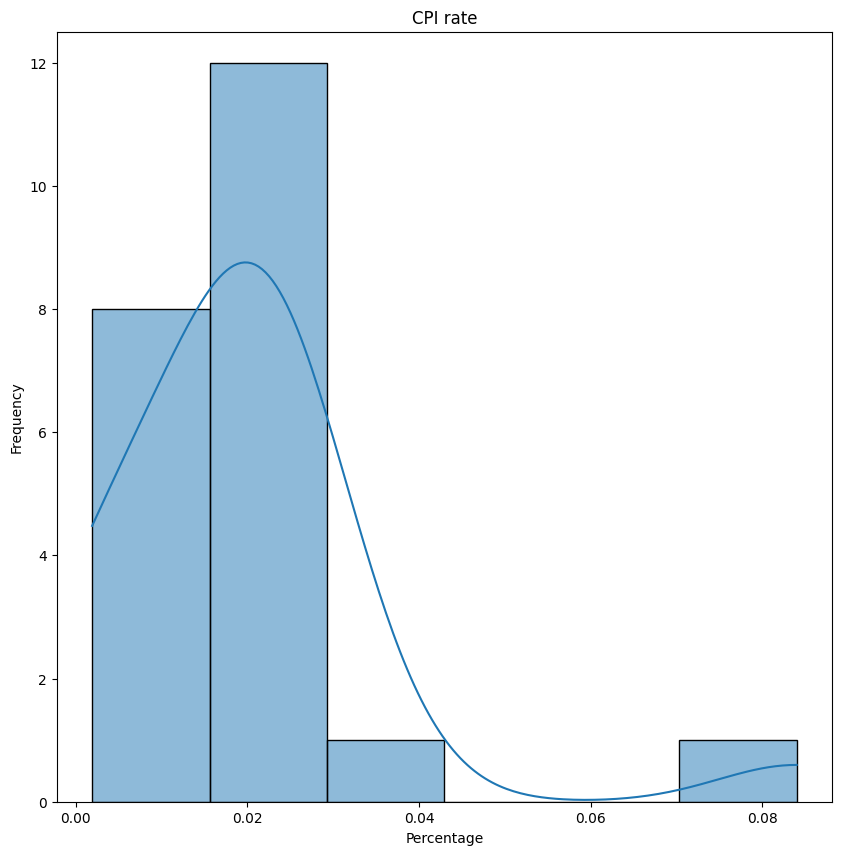

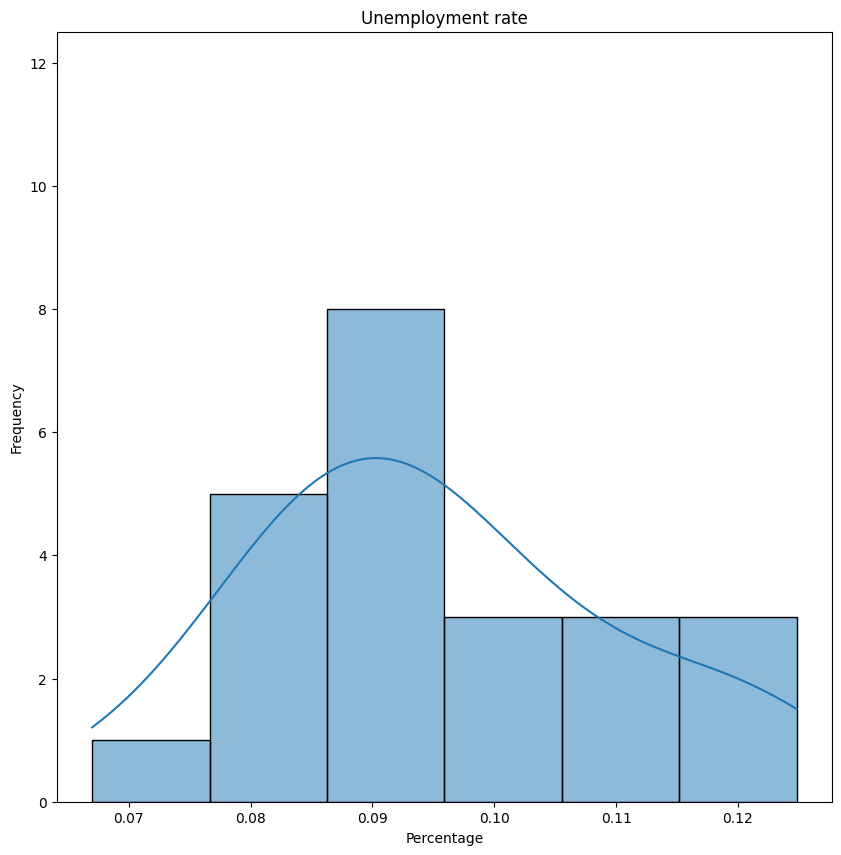

In [48]:
# Creating a plot for each data 
for i in range(1,9):
    plt.figure(figsize=(10, 10))
    sns.histplot(Nofirstcol.iloc[:,i], kde=True, bins=6)
    # plt.hist(Nofirstcol.iloc[:,0], weights=np.ones(len(Nofirstcol.iloc[:,0])) / len(Nofirstcol.iloc[:,0]))

    plt.ylim([0,12.5])
    plt.title(Nofirstcol.columns[i])
    plt.xlabel('Percentage')
    plt.ylabel('Frequency')
    plt.grid(False)
    plt.show() 

The table presented below shows the matrix of correlations between variables. It can be observed that there is a strong positive correlation between variables Real Gross Domestic Product and Consumer Price Index, as well as for Central Government bond yield curve and EURIBOR – 3 month. Rather strong negative correlation can be observed for the EURIBOR – 3 month and Consumer Price Index, also for the Central Government bond yield curve with Consumer Price Index and with Real Gross Domestic Product. Other variables tends to be no significantly correlated or both low positively and negatively correlated. This results can be graphically observed on the presented below Figure 3. The more narrower the cycles the stronger the positive correlation, the farer the figures are from smooth oval – the stronger the negative correlation.

In [49]:
Nofirstcol.columns = ['tobedeleted',
                      'Consumer Price Index',
                      'Real Gross Domestic Product',
                      'EURIBOR - 3-Month',
                      'Central government bond yield curve ',
                      'GDP growth rate',
                      'Yield Structure',
                      'CPI rate',
                      'Unemployment rate',]


Corr_df = Nofirstcol.loc[:,['Unemployment rate',
                'Consumer Price Index',
                'Real Gross Domestic Product',
                'EURIBOR - 3-Month',
                'Central government bond yield curve ',
                'Yield Structure']]


Corr_df.corr(method='pearson').to_clipboard()
Corr_matrix = Corr_df.corr(method='pearson')

Corr_matrix

,Unemployment rate,Consumer Price Index,Real Gross Domestic Product,EURIBOR - 3-Month,Central government bond yield curve,Yield Structure
Unemployment rate,1.000000,-0.036225,-0.240640,-0.307894,0.053335,0.679006
Consumer Price Index,-0.036225,1.000000,0.941045,-0.823118,-0.839112,0.028352
Real Gross Domestic Product,-0.240640,0.941045,1.000000,-0.710134,-0.834536,-0.176861
EURIBOR - 3-Month,-0.307894,-0.823118,-0.710134,1.000000,0.855369,-0.333071
Central government bond yield curve,0.053335,-0.839112,-0.834536,0.855369,1.000000,0.203543
Yield Structure,0.679006,0.028352,-0.176861,-0.333071,0.203543,1.000000


c:\Users\mateu\OneDrive\Pulpit\pythonnn\CS1-env\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  func(x=x, y=y, **kwargs)
c:\Users\mateu\OneDrive\Pulpit\pythonnn\CS1-env\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  func(x=x, y=y, **kwargs)
c:\Users\mateu\OneDrive\Pulpit\pythonnn\CS1-env\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  func(x=x, y=y, **kwargs)
c:\Users\mateu\OneDrive\Pulpit\pythonnn\CS1-env\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  func(x=x, y=y, **kwargs)


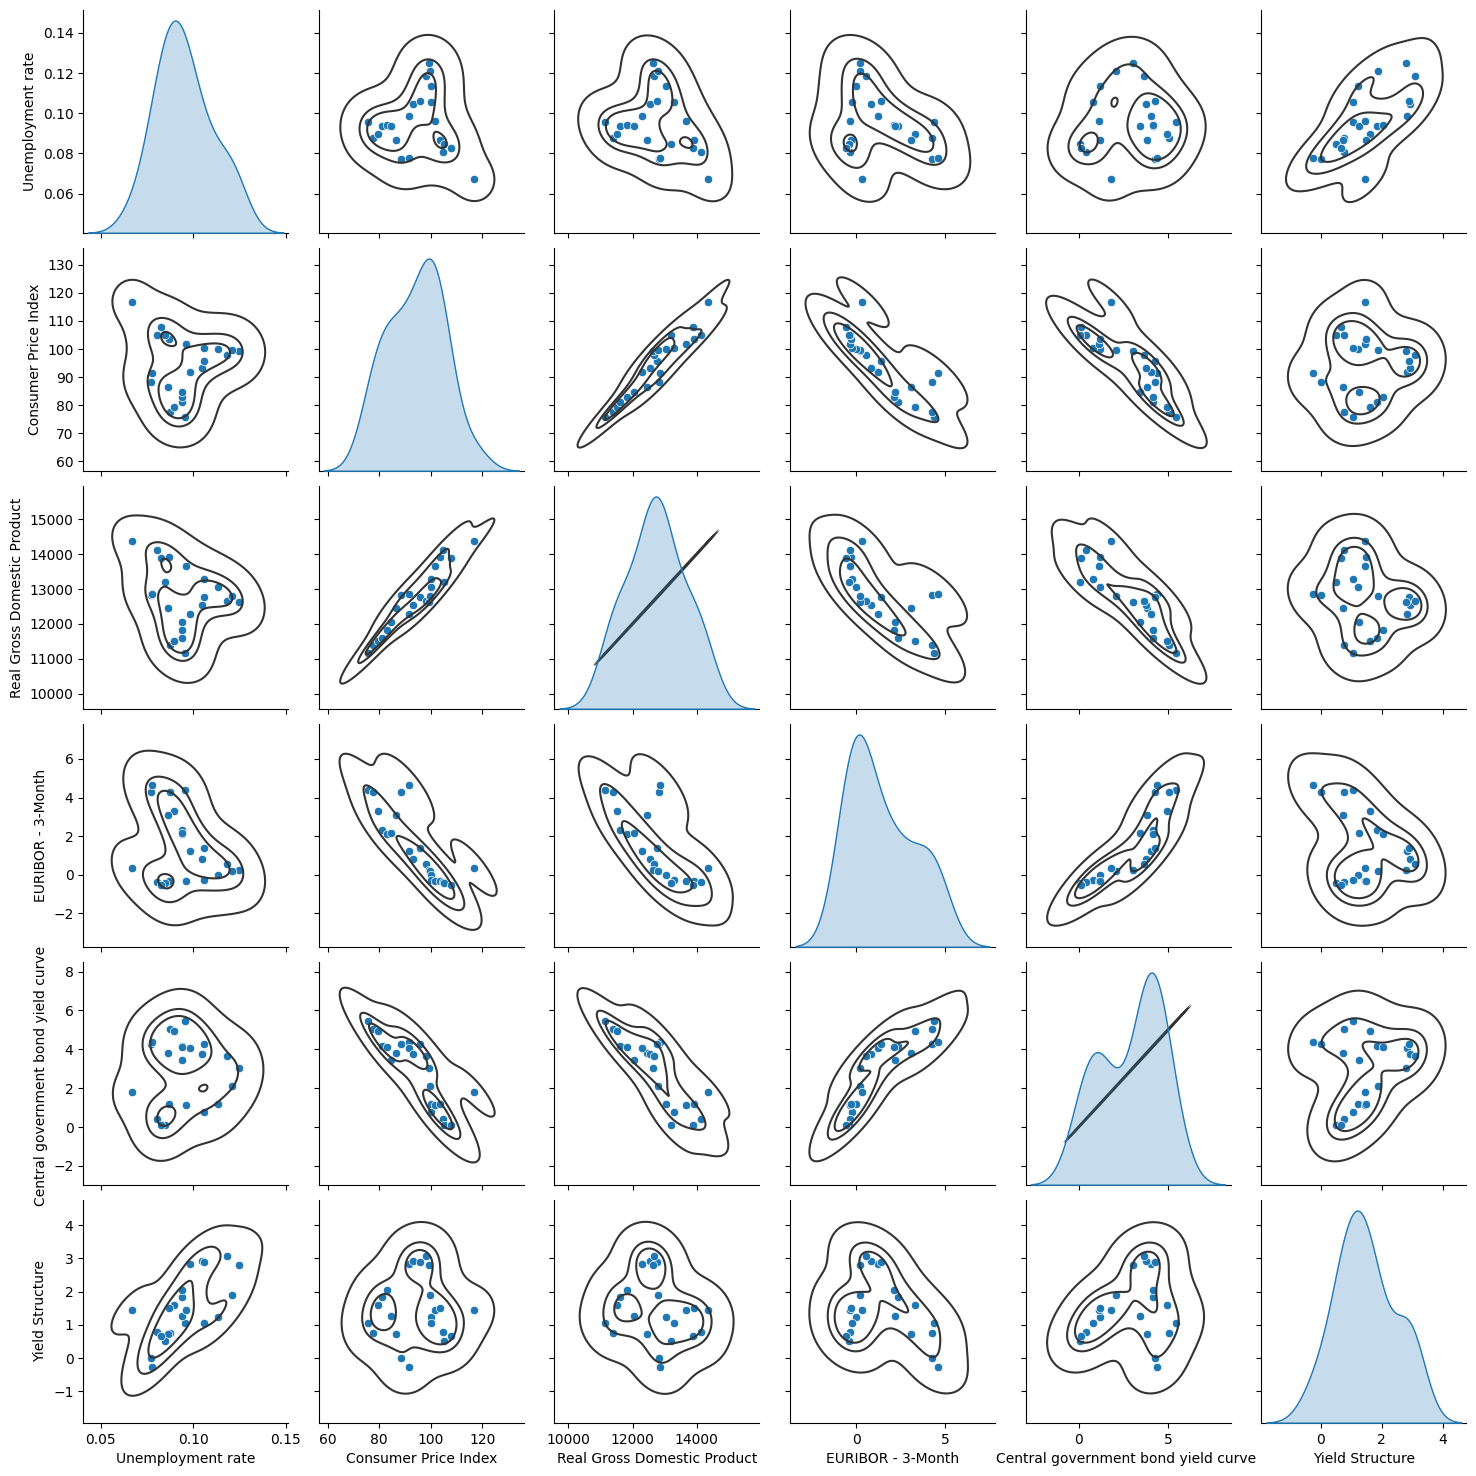

In [50]:
g = sns.pairplot(Corr_df, diag_kind="kde")
g.map(sns.kdeplot, levels=4, color=".2")